In [3]:
!pip install transformers spacy nltk scikit-learn pandas matplotlib


In [4]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Example customer data
import pandas as pd
data = pd.DataFrame({
    'Customer_ID': [1, 2, 3, 4, 5],
    'Review': [
        "I love the product, it's amazing and worth the price!",
        "The service was slow, and the staff was unhelpful.",
        "Great experience! The support team resolved my issue quickly.",
        "Not satisfied with the quality. It didn't meet my expectations.",
        "Excellent! I will recommend this to everyone."
    ]
})

# Perform sentiment analysis
data['Sentiment'] = data['Review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
print(data)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


   Customer_ID                                             Review Sentiment
0            1  I love the product, it's amazing and worth the...  POSITIVE
1            2  The service was slow, and the staff was unhelp...  NEGATIVE
2            3  Great experience! The support team resolved my...  POSITIVE
3            4  Not satisfied with the quality. It didn't meet...  NEGATIVE
4            5      Excellent! I will recommend this to everyone.  POSITIVE


In [5]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to extract keywords
def extract_keywords(text):
    doc = nlp(text)
    return [token.text for token in doc if token.is_alpha and not token.is_stop]

# Extract keywords from reviews
data['Keywords'] = data['Review'].apply(lambda x: extract_keywords(x))
print(data)


   Customer_ID                                             Review Sentiment  \
0            1  I love the product, it's amazing and worth the...  POSITIVE   
1            2  The service was slow, and the staff was unhelp...  NEGATIVE   
2            3  Great experience! The support team resolved my...  POSITIVE   
3            4  Not satisfied with the quality. It didn't meet...  NEGATIVE   
4            5      Excellent! I will recommend this to everyone.  POSITIVE   

                                            Keywords  
0             [love, product, amazing, worth, price]  
1                  [service, slow, staff, unhelpful]  
2  [Great, experience, support, team, resolved, i...  
3           [satisfied, quality, meet, expectations]  
4                             [Excellent, recommend]  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert keywords to a TF-IDF matrix
vectorizer = TfidfVectorizer()
keywords_matrix = vectorizer.fit_transform(data['Keywords'].apply(lambda x: ' '.join(x)))


In [7]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(keywords_matrix)

# Add cluster labels to the dataset
data['Cluster'] = clusters
print(data)


   Customer_ID                                             Review Sentiment  \
0            1  I love the product, it's amazing and worth the...  POSITIVE   
1            2  The service was slow, and the staff was unhelp...  NEGATIVE   
2            3  Great experience! The support team resolved my...  POSITIVE   
3            4  Not satisfied with the quality. It didn't meet...  NEGATIVE   
4            5      Excellent! I will recommend this to everyone.  POSITIVE   

                                            Keywords  Cluster  
0             [love, product, amazing, worth, price]        2  
1                  [service, slow, staff, unhelpful]        0  
2  [Great, experience, support, team, resolved, i...        1  
3           [satisfied, quality, meet, expectations]        1  
4                             [Excellent, recommend]        1  


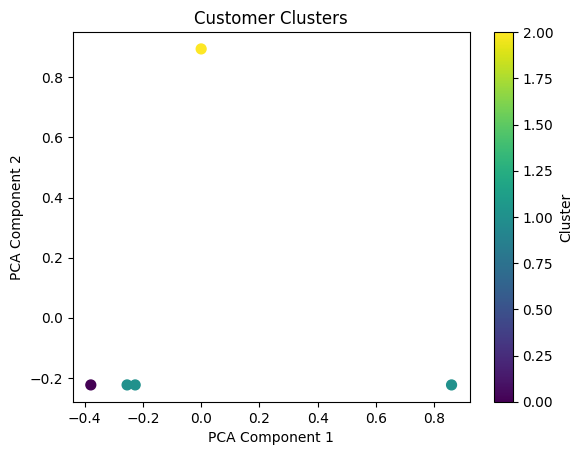

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
keywords_2d = pca.fit_transform(keywords_matrix.toarray())

# Plot the clusters
plt.scatter(keywords_2d[:, 0], keywords_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
